In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.interpolate import pchip_interpolate
import numpy as np
import math
from pandas import Series
from lmfit import Model, Parameter, report_fit
import scipy.ndimage
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from numpy import ones,vstack
from numpy.linalg import lstsq
from scipy import stats
import numpy as np
import scipy.stats as st
from scipy.io import loadmat
import h5py
import matlab.engine

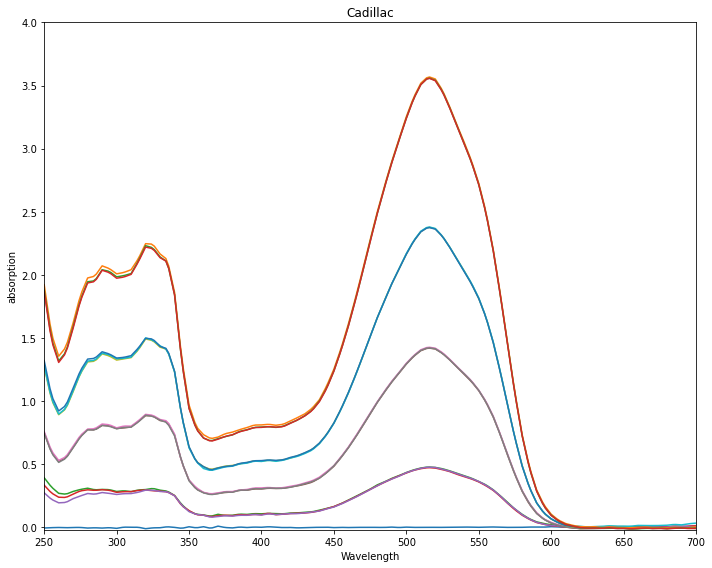

In [2]:
df_mat = pd.read_csv('../../../CDOM_DATA/PATHLENGTH_DATA_2/20230802_AZ_LCalc/20230802_AZ_LCalc.csv')
df_mat.index = df_mat['NaN_wl'] 

#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df_mat.plot(label='', ax=ax)
ax.set_ylim(-.02,4)
ax.set_xlim(250,700)
ax.set_xlabel("Wavelength")
ax.set_ylabel("absorption")
ax.set_title("Cadillac")
ax.get_legend().remove()
plt.tight_layout()
fig.set_facecolor('w')

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA_2/Plots/Cadillac_spectra.png')

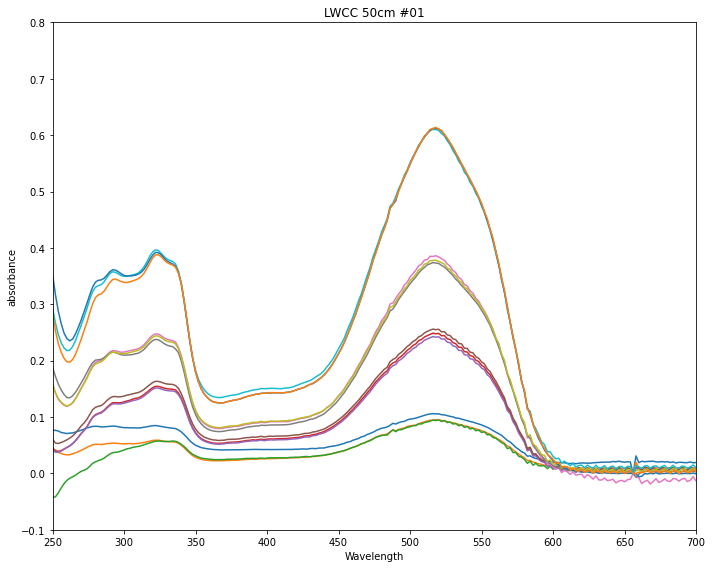

In [3]:
files = glob.glob('../../../CDOM_DATA/PATHLENGTH_DATA_2/50_CM_LWCC/*.txt')

def GET_DATA(name):
    df = pd.read_csv(name, skiprows=15, sep='\t', names=['wl', 'abs'], )
    df['abs'] = df['abs']
    x = df['wl']
    y = df['abs'] 
    pchip_obj1 = scipy.interpolate.PchipInterpolator(x, y, axis=0, extrapolate=None)
    xi = np.arange(250,702,2)
    yi = pchip_obj1(xi)
    d = {'wl': xi, 'abs': yi}
    df = pd.DataFrame(d)
    return df

frames = []
for f in files:
    df = GET_DATA(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index

lwcc_50_01 = df

#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-.1,.8)
ax.set_xlim(250,700)
ax.set_xlabel("Wavelength")
ax.set_ylabel("absorbance")
ax.set_title("LWCC 50cm #01")
ax.get_legend().remove()
fig.set_facecolor('w')
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA_2/Plots/LWCC_50cm.png')

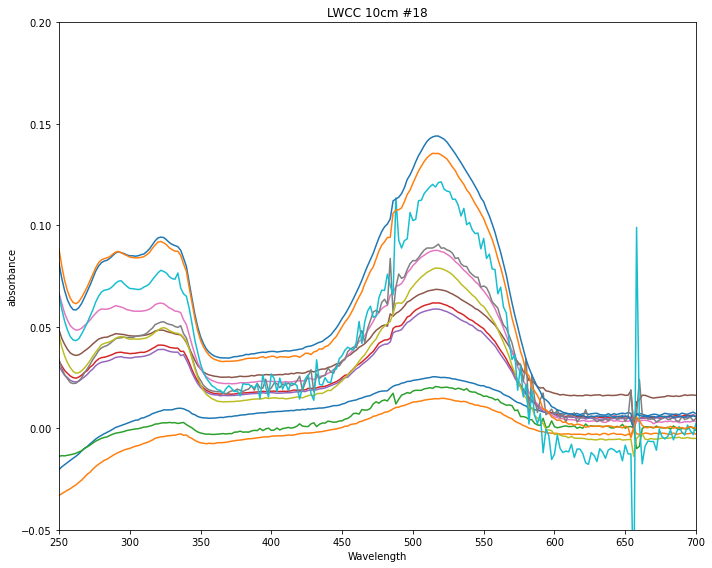

In [4]:
files = glob.glob('../../../CDOM_DATA/PATHLENGTH_DATA_2/10_CM_LWCC/*.txt')

frames = []
for f in files:
    df = GET_DATA(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index

lwcc_10_18 = df

#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-.05,.2)
ax.set_xlim(250,700)
ax.set_xlabel("Wavelength")
ax.set_ylabel("absorbance")
ax.set_title("LWCC 10cm #18")
ax.get_legend().remove()
fig.set_facecolor('w')
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA_2/Plots/LWCC_10cm.png')

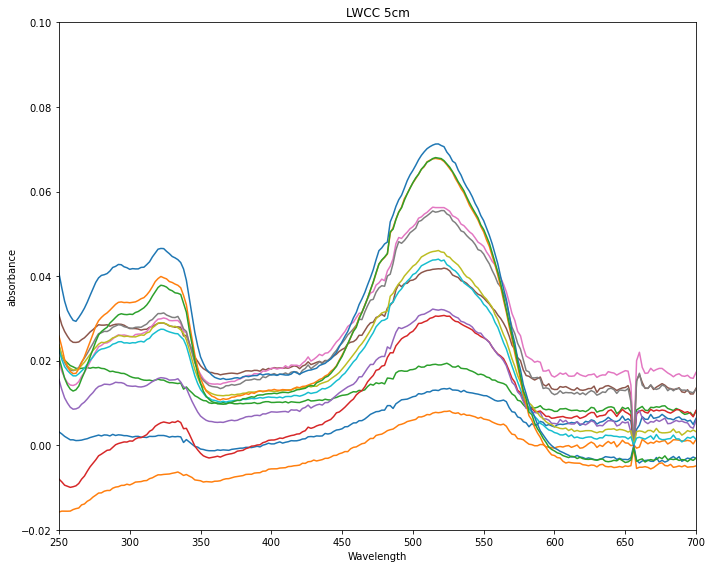

In [5]:
files = glob.glob('../../../CDOM_DATA/PATHLENGTH_DATA_2/5_CM_LWCC/*.txt')

frames = []
for f in files:
    df = GET_DATA(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index

lwcc_5 = df

#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-.02,.1)
ax.set_xlim(250,700)
ax.set_xlabel("Wavelength")
ax.set_ylabel("absorbance")
ax.set_title("LWCC 5cm")
ax.get_legend().remove()
fig.set_facecolor('w')
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA_2/Plots/LWCC_5cm.png')

In [6]:
# Define new column names
new_column_names = ['spec_blank', 'wl', 'spec_1ml_a', 'spec_1ml_b', 'spec_1ml_c', 
                    'spec_3ml_a', 'spec_3ml_b', 'spec_3ml_c', 
                    'spec_5ml_a', 'spec_5ml_b', 'spec_5ml_c', 
                    'spec_7.5ml_a', 'spec_7.5ml_b', 'spec_7.5ml_c']

# Assign new column names to df_mat
df_mat.columns = new_column_names
df_mat = df_mat.drop('wl', axis=1)
df_mat

spec_blank  spec_1ml_a  spec_1ml_b  spec_1ml_c  spec_3ml_a  \
NaN_wl                                                               
250      -0.005804    0.392091    0.333180    0.272864    0.749877   
252      -0.004661    0.362751    0.308492    0.252184    0.687595   
254      -0.003519    0.333410    0.283804    0.231503    0.625313   
256      -0.002690    0.308802    0.264783    0.215669    0.579878   
258      -0.002174    0.288962    0.251464    0.204718    0.551317   
...            ...         ...         ...         ...         ...   
692       0.000907    0.005674    0.006444    0.007729   -0.006997   
694       0.001055    0.003794    0.009086    0.007488   -0.006894   
696       0.000769    0.003865    0.010958    0.007024   -0.007148   
698       0.000051    0.005840    0.012012    0.006292   -0.007793   
700      -0.000668    0.007788    0.013039    0.005532   -0.008458   

        spec_3ml_b  spec_3ml_c  spec_5ml_a  spec_5ml_b  spec_5ml_c  \
NaN_wl                                                               
250       0.758836    0.746423    1.273426    1.281717    1.320223   
252       0.697355    0.683348    1.168502    1.176562    1.209716   
254       0.635874    0.620274    1.063577    1.071407    1.099209   
256       0.590076    0.573812    0.987270    0.994437    1.019425   
258       0.559985    0.543989    0.939615    0.945685    0.970396   
...            ...         ...         ...         ...         ...   
692      -0.005381   -0.007080   -0.003244    0.022614   -0.005298   
694      -0.006171   -0.006185   -0.004497    0.026170   -0.004460   
696      -0.006462   -0.006287   -0.004116    0.028987   -0.003549   
698      -0.006287   -0.007420   -0.002143    0.031025   -0.002608   
700      -0.006132   -0.008573   -0.000196    0.033037   -0.001692   

        spec_7.5ml_a  spec_7.5ml_b  spec_7.5ml_c  
NaN_wl                                            
250         1.921831      1.879156      1.865707  
252         1.766295      1.725012      1.711442  
254         1.610760      1.570867      1.557178  
256         1.497477      1.458602      1.445254  
258         1.426479      1.388249      1.375702  
...              ...           ...           ...  
692        -0.003089     -0.006723     -0.007479  
694        -0.003136     -0.007341     -0.009358  
696        -0.001659     -0.007812     -0.009968  
698         0.001298     -0.008181     -0.009351  
700         0.004230     -0.008575     -0.008759  

[226 rows x 13 columns]

In [7]:
files = glob.glob('../../../CDOM_DATA/PATHLENGTH_DATA_2/*CM*/*.txt')

# Sort the file paths
files = sorted(files)

# Function to extract LWCC and volume information from the file path
def extract_info(file_path):
    parts = file_path.split('\\')
    lwcc_info = parts[-2].replace('_CM_LWCC', '')
    volume_info = parts[-1].split('_')[1]
    return lwcc_info, volume_info

frames = []
all_ids = []
for f in files:
    df = GET_DATA(f) # runs the processing function 
    lwcc_info, volume_info = extract_info(f)
    id_base = f'LWCC{lwcc_info}_{volume_info}'
    if not all_ids or id_base not in all_ids[-1]:
        letter = 'a'
    else:
        base, previous_letter = all_ids[-1].rsplit('_', 1)
        letter = chr(ord(previous_letter) + 1)
    ID = f'{id_base}_{letter}'
    all_ids.append(ID)
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 

df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df = pd.concat([df, df_mat], axis=1)

In [8]:
# Prefix 'a' to the index
df.index = 'a' + df.index.astype(str)

# Transpose the DataFrame
df = df.transpose()

# Add new columns to the DataFrame
df.insert(0, 'LWCC', '')   # Adding 'LWCC' column at the second position
df.insert(1, 'Conc_ml', '')   # Adding 'Conc' column at the third position
df.insert(2, 'Conc', '')   # Adding 'Conc' column at the third position
df.insert(3, 'Dil', '')    # Adding 'Dil' column at the fourth position
df.insert(4, 'group', '')    # Adding 'Dil' column at the fourth position
df.insert(5, 'mean_abs', '')    # Adding 'Dil' column at the fourth position
df.insert(6, 'path_L', '')    # Adding 'Dil' column at the fourth position

In [9]:
# Fill 'LWCC' column based on the index
df.loc[df.index.str.startswith('spec'), 'LWCC'] = 'Cadillac'
df.loc[df.index.str.startswith('LWCC5'), 'LWCC'] = '5cm'
df.loc[df.index.str.startswith('LWCC1'), 'LWCC'] = 'CUV'
df.loc[df.index.str.startswith('LWCC50'), 'LWCC'] = '50cm_#01'
df.loc[df.index.str.startswith('LWCC10'), 'LWCC'] = '10cm'


GET PATHLENGTHS

In [10]:
def extract_volume(index):
    split_index = index.split('_')
    for part in split_index:
        if 'ml' in part:
            return part.replace('ml','')
    return None

# Apply the function to each element of the index
volumes = [extract_volume(idx) for idx in df.index]

# Assign the list to the 'conc' column
df['Conc_ml'] = volumes
df.loc[df.index == 'spec_blank', 'Conc_ml'] = 0
df['Conc_ml'] = pd.to_numeric(df['Conc_ml'])
df['Conc'] = df['Conc_ml']/7.5*100
df['Dil'] = 100/df['Conc']
df.loc[df.index == 'spec_blank', 'Conc'] = 0
df.loc[df.index == 'spec_blank', 'Dil'] = 0
df = df.drop('spec_blank', axis=0)


df.to_csv('../../../CDOM_DATA/PATHLENGTH_DATA_2/data_concat.csv')

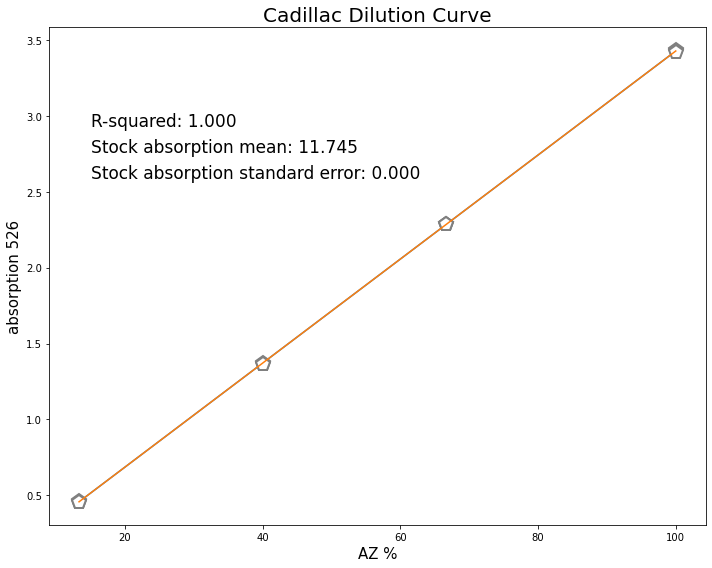

In [11]:
df_grouped = df.groupby(by="LWCC")

df_cadi = df_grouped.get_group("Cadillac")
df_cadi

abs550 = df_cadi['a526']
conc = df_cadi['Conc']
dil = df_cadi['Dil']

res = stats.linregress(conc, abs550)

Stock_abs = dil * abs550
Stock_abs_mean = np.mean(Stock_abs)
Stock_abs_max = np.max(Stock_abs)
Stock_abs_se = np.std(Stock_abs, ddof=1) / np.sqrt(np.size(Stock_abs))

m, b = np.polyfit(conc, abs550, 1)

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(conc, m*conc+b)
ax.plot(conc, abs550, '-p', color='gray',
         markersize=15, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.plot(conc, m*conc+b)
ax.set_xlabel("AZ %", size = 15)
ax.set_ylabel("absorption 526", size = 15)
ax.text(15,Stock_abs_max*.85,f"R-squared: {res.rvalue**2:.3f}", fontsize=17, ha='left')
ax.text(15,Stock_abs_max*.8,f"Stock absorption mean: {Stock_abs_mean**2:.3f}", fontsize=17, ha='left')
ax.text(15,Stock_abs_max*.75,f"Stock absorption standard error: {Stock_abs_se**2:.3f}", fontsize=17, ha='left')
ax.set_title("Cadillac Dilution Curve", size = 20)
plt.tight_layout()
fig.set_facecolor('w')

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA_2/Plots/Cadillac_Dilution_Curve.png')

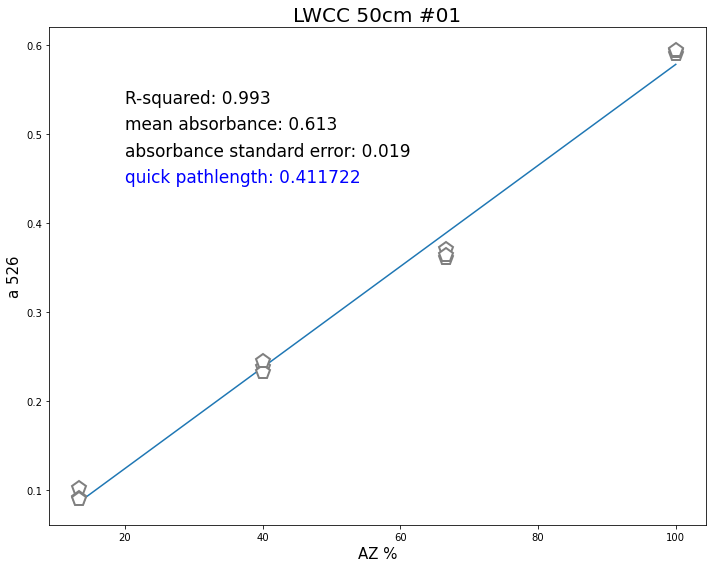

In [12]:
df_50cm_01 = df_grouped.get_group("50cm_#01")

a550 = df_50cm_01['a526']
conc = df_50cm_01['Conc']
dil = df_50cm_01['Dil']

res = stats.linregress(conc, a550)

cm_abs = dil * a550 
cm_abs_mean = np.mean(cm_abs)
abs_max = np.max(a550)
cm_abs_se = np.std(cm_abs, ddof=1) / np.sqrt(np.size(cm_abs))

m, b = np.polyfit(conc, a550, 1)

L = cm_abs_mean * 2.303 / Stock_abs_mean

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(conc, m*conc+b)
ax.plot(conc, a550, '-p', color='gray',
         markersize=15, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
ax.set_xlabel("AZ %", size = 15)
ax.set_ylabel("a 526", size = 15)
ax.text(20,abs_max*.9,f"R-squared: {res.rvalue**2:.3f}", fontsize=17, ha='left')
ax.text(20,abs_max*.85,f"mean absorbance: {cm_abs_mean:.3f}", fontsize=17, ha='left')
ax.text(20,abs_max*.8,f"absorbance standard error: {cm_abs_se:.3f}", fontsize=17, ha='left')
ax.text(20,abs_max*.75,f"quick pathlength: {L:.6f}", fontsize=17, ha='left', color = 'b')
ax.set_title("LWCC 50cm #01", size = 20)
plt.tight_layout()
fig.set_facecolor('w')

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA_2/Plots/LWCC_50cm_#01_Dilution_Curve.png')

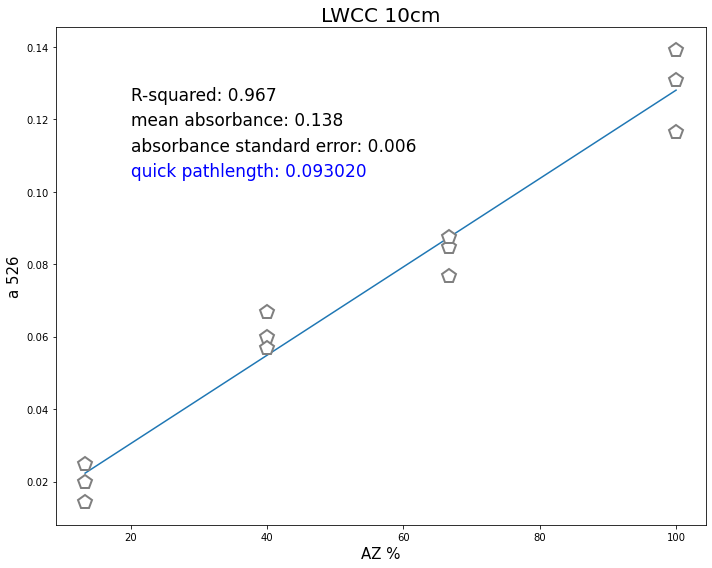

In [13]:
df_10cm = df_grouped.get_group("10cm")

a550 = df_10cm['a526']
conc = df_10cm['Conc']
dil = df_10cm['Dil']

res = stats.linregress(conc, a550)

cm_abs = dil * a550 
cm_abs_mean = np.mean(cm_abs)
abs_max = np.max(a550)
cm_abs_se = np.std(cm_abs, ddof=1) / np.sqrt(np.size(cm_abs))

m, b = np.polyfit(conc, a550, 1)

L = cm_abs_mean * 2.303 / Stock_abs_mean

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(conc, m*conc+b)
ax.plot(conc, a550, '-p', color='gray',
         markersize=15, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
ax.set_xlabel("AZ %", size = 15)
ax.set_ylabel("a 526", size = 15)
ax.text(20,abs_max*.9,f"R-squared: {res.rvalue**2:.3f}", fontsize=17, ha='left')
ax.text(20,abs_max*.85,f"mean absorbance: {cm_abs_mean:.3f}", fontsize=17, ha='left')
ax.text(20,abs_max*.8,f"absorbance standard error: {cm_abs_se:.3f}", fontsize=17, ha='left')
ax.text(20,abs_max*.75,f"quick pathlength: {L:.6f}", fontsize=17, ha='left', color = 'b')
ax.set_title("LWCC 10cm", size = 20)
plt.tight_layout()
fig.set_facecolor('w')

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA_2/Plots/LWCC_10cm_Dilution_Curve.png')

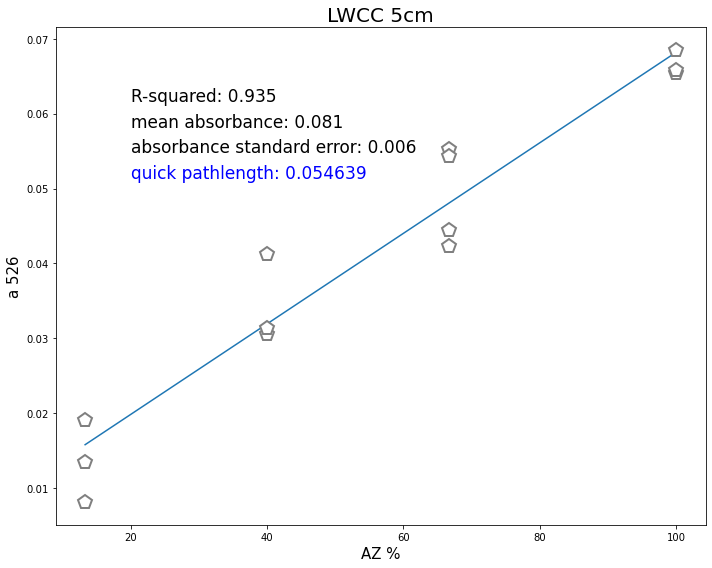

In [14]:
df_5cm = df_grouped.get_group("5cm")

a550 = df_5cm['a526']
conc = df_5cm['Conc']
dil = df_5cm['Dil']

res = stats.linregress(conc, a550)

cm_abs = dil * a550 
cm_abs_mean = np.mean(cm_abs)
abs_max = np.max(a550)
cm_abs_se = np.std(cm_abs, ddof=1) / np.sqrt(np.size(cm_abs))

m, b = np.polyfit(conc, a550, 1)

L = cm_abs_mean * 2.303 / Stock_abs_mean

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(conc, m*conc+b)
ax.plot(conc, a550, '-p', color='gray',
         markersize=15, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
ax.set_xlabel("AZ %", size = 15)
ax.set_ylabel("a 526", size = 15)
ax.text(20,abs_max*.9,f"R-squared: {res.rvalue**2:.3f}", fontsize=17, ha='left')
ax.text(20,abs_max*.85,f"mean absorbance: {cm_abs_mean:.3f}", fontsize=17, ha='left')
ax.text(20,abs_max*.8,f"absorbance standard error: {cm_abs_se:.3f}", fontsize=17, ha='left')
ax.text(20,abs_max*.75,f"quick pathlength: {L:.6f}", fontsize=17, ha='left', color = 'b')
ax.set_title("LWCC 5cm", size = 20)
plt.tight_layout()
fig.set_facecolor('w')

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA_2/Plots/LWCC_5cm_Dilution_Curve.png')

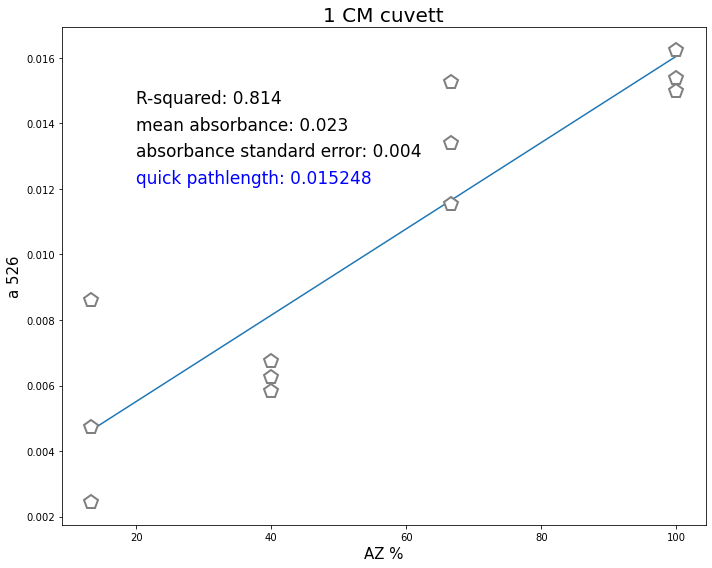

In [15]:
df_cuv = df_grouped.get_group("CUV")

a550 = df_cuv['a526']
conc = df_cuv['Conc']
dil = df_cuv['Dil']

res = stats.linregress(conc, a550)

cm_abs = dil * a550 
cm_abs_mean = np.mean(cm_abs)
abs_max = np.max(a550)
cm_abs_se = np.std(cm_abs, ddof=1) / np.sqrt(np.size(cm_abs))

m, b = np.polyfit(conc, a550, 1)

L = cm_abs_mean * 2.303 / Stock_abs_mean

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(conc, m*conc+b)
ax.plot(conc, a550, '-p', color='gray',
         markersize=15, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
ax.set_xlabel("AZ %", size = 15)
ax.set_ylabel("a 526", size = 15)
ax.text(20,abs_max*.9,f"R-squared: {res.rvalue**2:.3f}", fontsize=17, ha='left')
ax.text(20,abs_max*.85,f"mean absorbance: {cm_abs_mean:.3f}", fontsize=17, ha='left')
ax.text(20,abs_max*.8,f"absorbance standard error: {cm_abs_se:.3f}", fontsize=17, ha='left')
ax.text(20,abs_max*.75,f"quick pathlength: {L:.6f}", fontsize=17, ha='left', color = 'b')
ax.set_title("1 CM cuvett", size = 20)
plt.tight_layout()
fig.set_facecolor('w')

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA_2/Plots/LWCC_1cm_Dilution_Curve.png')

In [16]:
ml1_mean = df_cadi.loc[df_cadi["Conc_ml"] == 1, "a526"].mean()
df.loc[df["Conc_ml"] == 1, "mean_abs"] = ml1_mean
ml3_mean = df_cadi.loc[df_cadi["Conc_ml"] == 3, "a526"].mean()
df.loc[df["Conc_ml"] == 3, "mean_abs"] = ml3_mean
ml5_mean = df_cadi.loc[df_cadi["Conc_ml"] == 5, "a526"].mean()
df.loc[df["Conc_ml"] == 5, "mean_abs"] = ml5_mean
ml7_mean = df_cadi.loc[df_cadi["Conc_ml"] == 7.5, "a526"].mean()
df.loc[df["Conc_ml"] == 7.5, "mean_abs"] = ml7_mean

df['path_L'] = (df['a526'] * 2.303)/ df['mean_abs']


In [17]:
#Define the WPI Pathlengths
WPI_LWCC_50_01 = .489 
WPI_LWCC_10 = .10
WPI_LWCC_5 = .05 
WPI_CUV = .01

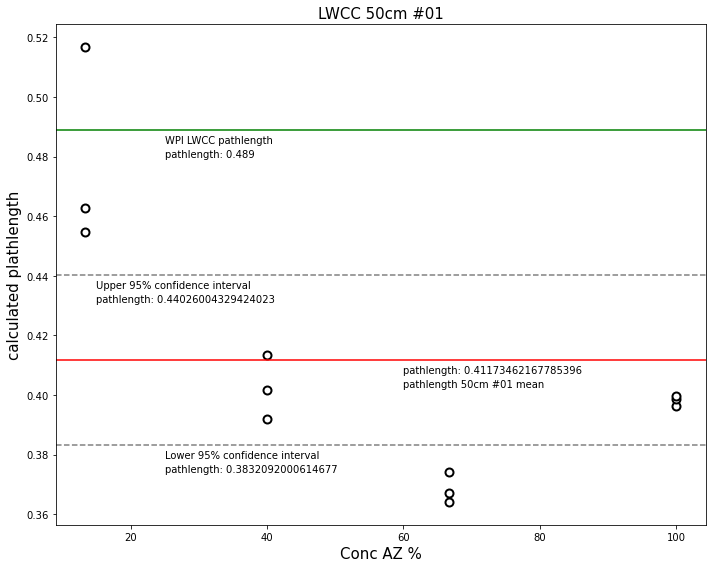

In [18]:
#plot resuts 
df_PL_groups = df.groupby(by="LWCC")
df_PL_group = df_PL_groups.get_group("50cm_#01")

plath_L = df_PL_group['path_L']
conc = df_PL_group['Conc']

CI = st.t.interval(alpha=0.95, df=len(plath_L)-1, loc=np.mean(plath_L), scale=st.sem(plath_L)) 
CI_lower = CI[0]
CI_upper = CI[1]

pathlength_50cm_01 = np.mean(plath_L)
CI_lower_50cm_01 = CI_lower
CI_upper_50cm_01 = CI_upper

shift_val = (plath_L.max() - plath_L.min()) *.03

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(conc, plath_L, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='black',
         markeredgewidth=2)
ax.axhline(y=np.mean(CI_lower), c='grey', linestyle='dashed')
ax.text(25,CI_lower-shift_val,"Lower 95% confidence interval", fontsize=10, ha='left')
ax.text(25,CI_lower-shift_val*2,f"pathlength: {CI_lower}", fontsize=10, ha='left')

ax.axhline(y=np.mean(CI_upper), c='grey', linestyle='dashed')
ax.text(15,CI_upper-shift_val,"Upper 95% confidence interval", fontsize=10, ha='left')
ax.text(15,CI_upper-shift_val*2,f"pathlength: {CI_upper}", fontsize=10, ha='left')

ax.axhline(y=np.mean(plath_L), c='red')
ax.text(60,np.mean(plath_L)-shift_val,f"pathlength: {np.mean(plath_L)}", fontsize=10, ha='left')
ax.text(60,np.mean(plath_L)-shift_val*2,"pathlength 50cm #01 mean", fontsize=10, ha='left')

ax.axhline(y=np.mean(WPI_LWCC_50_01), c='green')
ax.text(25,WPI_LWCC_50_01-shift_val,"WPI LWCC pathlength", fontsize=10, ha='left')
ax.text(25,WPI_LWCC_50_01-shift_val*2,f"pathlength: {WPI_LWCC_50_01}", fontsize=10, ha='left')

ax.set_xlabel("Conc AZ %", size = 15)
ax.set_ylabel("calculated plathlength", size = 15)
ax.set_title("LWCC 50cm #01", size = 15)
fig.set_facecolor('w')
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA_2/Plots/LWCC_50cm_plathlength.png')

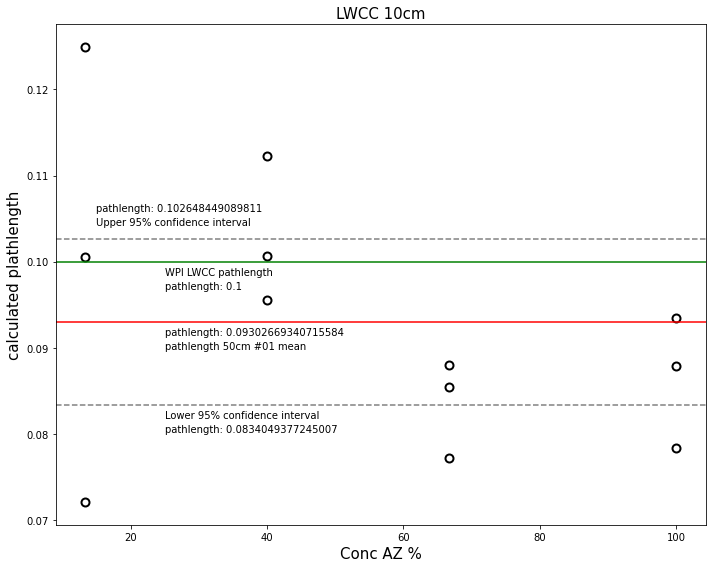

In [19]:
#plot resuts 
df_PL_groups = df.groupby(by="LWCC")
df_PL_group = df_PL_groups.get_group("10cm")

plath_L = df_PL_group['path_L']
conc = df_PL_group['Conc']

CI = st.t.interval(alpha=0.95, df=len(plath_L)-1, loc=np.mean(plath_L), scale=st.sem(plath_L)) 
CI_lower = CI[0]
CI_upper = CI[1]

pathlength_50cm_01 = np.mean(plath_L)
CI_lower_50cm_01 = CI_lower
CI_upper_50cm_01 = CI_upper

shift_val = (plath_L.max() - plath_L.min()) *.03

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(conc, plath_L, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='black',
         markeredgewidth=2)
ax.axhline(y=np.mean(CI_lower), c='grey', linestyle='dashed')
ax.text(25,CI_lower-shift_val,"Lower 95% confidence interval", fontsize=10, ha='left')
ax.text(25,CI_lower-shift_val*2,f"pathlength: {CI_lower}", fontsize=10, ha='left')

ax.axhline(y=np.mean(CI_upper), c='grey', linestyle='dashed')
ax.text(15,CI_upper+shift_val,"Upper 95% confidence interval", fontsize=10, ha='left')
ax.text(15,CI_upper+shift_val*2,f"pathlength: {CI_upper}", fontsize=10, ha='left')

ax.axhline(y=np.mean(plath_L), c='red')
ax.text(25,np.mean(plath_L)-shift_val,f"pathlength: {np.mean(plath_L)}", fontsize=10, ha='left')
ax.text(25,np.mean(plath_L)-shift_val*2,"pathlength 50cm #01 mean", fontsize=10, ha='left')

ax.axhline(y=np.mean(WPI_LWCC_10), c='green')
ax.text(25,WPI_LWCC_10-shift_val,"WPI LWCC pathlength", fontsize=10, ha='left')
ax.text(25,WPI_LWCC_10-shift_val*2,f"pathlength: {WPI_LWCC_10}", fontsize=10, ha='left')

ax.set_xlabel("Conc AZ %", size = 15)
ax.set_ylabel("calculated plathlength", size = 15)
ax.set_title("LWCC 10cm", size = 15)
fig.set_facecolor('w')
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA_2/Plots/LWCC_10cm_plathlength.png')

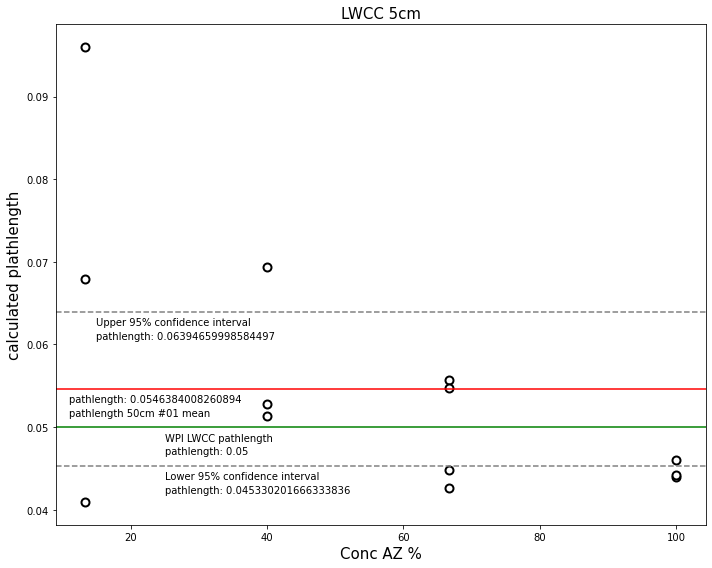

In [20]:
#plot resuts 
df_PL_groups = df.groupby(by="LWCC")
df_PL_group = df_PL_groups.get_group("5cm")

plath_L = df_PL_group['path_L']
conc = df_PL_group['Conc']

CI = st.t.interval(alpha=0.95, df=len(plath_L)-1, loc=np.mean(plath_L), scale=st.sem(plath_L)) 
CI_lower = CI[0]
CI_upper = CI[1]

pathlength_50cm_01 = np.mean(plath_L)
CI_lower_50cm_01 = CI_lower
CI_upper_50cm_01 = CI_upper

shift_val = (plath_L.max() - plath_L.min()) *.03

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(conc, plath_L, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='black',
         markeredgewidth=2)
ax.axhline(y=np.mean(CI_lower), c='grey', linestyle='dashed')
ax.text(25,CI_lower-shift_val,"Lower 95% confidence interval", fontsize=10, ha='left')
ax.text(25,CI_lower-shift_val*2,f"pathlength: {CI_lower}", fontsize=10, ha='left')

ax.axhline(y=np.mean(CI_upper), c='grey', linestyle='dashed')
ax.text(15,CI_upper-shift_val,"Upper 95% confidence interval", fontsize=10, ha='left')
ax.text(15,CI_upper-shift_val*2,f"pathlength: {CI_upper}", fontsize=10, ha='left')

ax.axhline(y=np.mean(plath_L), c='red')
ax.text(11,np.mean(plath_L)-shift_val,f"pathlength: {np.mean(plath_L)}", fontsize=10, ha='left')
ax.text(11,np.mean(plath_L)-shift_val*2,"pathlength 50cm #01 mean", fontsize=10, ha='left')

ax.axhline(y=np.mean(WPI_LWCC_5), c='green')
ax.text(25,WPI_LWCC_5-shift_val,"WPI LWCC pathlength", fontsize=10, ha='left')
ax.text(25,WPI_LWCC_5-shift_val*2,f"pathlength: {WPI_LWCC_5}", fontsize=10, ha='left')

ax.set_xlabel("Conc AZ %", size = 15)
ax.set_ylabel("calculated plathlength", size = 15)
ax.set_title("LWCC 5cm", size = 15)
fig.set_facecolor('w')
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA_2/Plots/LWCC_5cm_plathlength.png')

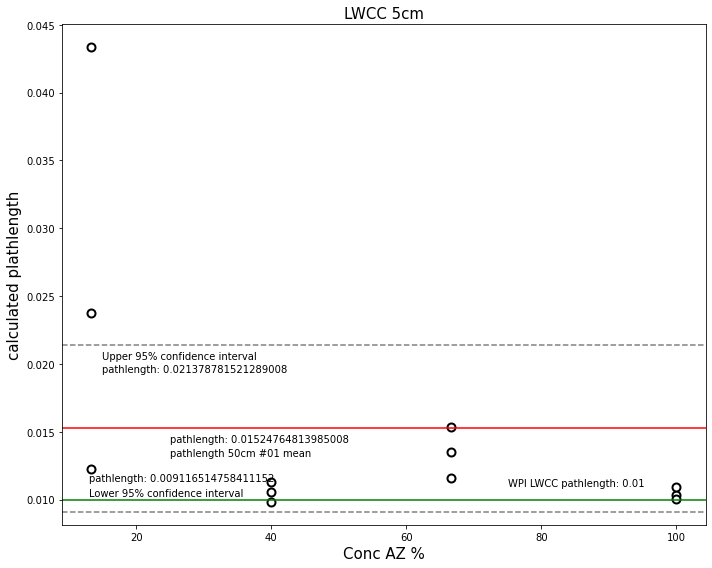

In [21]:
#plot resuts 
df_PL_groups = df.groupby(by="LWCC")
df_PL_group = df_PL_groups.get_group("CUV")

plath_L = df_PL_group['path_L']
conc = df_PL_group['Conc']

CI = st.t.interval(alpha=0.95, df=len(plath_L)-1, loc=np.mean(plath_L), scale=st.sem(plath_L)) 
CI_lower = CI[0]
CI_upper = CI[1]

pathlength_50cm_01 = np.mean(plath_L)
CI_lower_50cm_01 = CI_lower
CI_upper_50cm_01 = CI_upper

shift_val = (plath_L.max() - plath_L.min()) *.03

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(conc, plath_L, 'o', color='black',
         markersize=8, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='black',
         markeredgewidth=2)
ax.axhline(y=np.mean(CI_lower), c='grey', linestyle='dashed')
ax.text(13,CI_lower+shift_val/.90,"Lower 95% confidence interval", fontsize=10, ha='left')
ax.text(13,CI_lower+shift_val*2/.90,f"pathlength: {CI_lower}", fontsize=10, ha='left')

ax.axhline(y=np.mean(CI_upper), c='grey', linestyle='dashed')
ax.text(15,CI_upper-shift_val,"Upper 95% confidence interval", fontsize=10, ha='left')
ax.text(15,CI_upper-shift_val*2,f"pathlength: {CI_upper}", fontsize=10, ha='left')

ax.axhline(y=np.mean(plath_L), c='red')
ax.text(25,np.mean(plath_L)-shift_val,f"pathlength: {np.mean(plath_L)}", fontsize=10, ha='left')
ax.text(25,np.mean(plath_L)-shift_val*2,"pathlength 50cm #01 mean", fontsize=10, ha='left')

ax.axhline(y=np.mean(WPI_CUV), c='green')
ax.text(75,WPI_CUV+shift_val,f"WPI LWCC pathlength: {WPI_CUV} ", fontsize=10, ha='left')
#ax.text(25,WPI_CUV-shift_val*2,f"pathlength: {WPI_CUV}", fontsize=10, ha='left')

ax.set_xlabel("Conc AZ %", size = 15)
ax.set_ylabel("calculated plathlength", size = 15)
ax.set_title("LWCC 5cm", size = 15)
fig.set_facecolor('w')
plt.tight_layout()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA_2/Plots/LWCC_1cm_plathlength.png')

In [22]:
df_stats = df
df_stats['group'] = df_stats.index.str.slice(0, -3)
df_stats = df_stats.drop('LWCC', axis = 1)
df_stats.index = df_stats['group']

In [23]:
df_grouped = df.groupby(df_stats.index).agg(['mean', 'std', 'sem', 'mad'])
df_grouped.columns = ['_'.join(col).strip() for col in df_grouped.columns.values]
columns_to_drop = ['Conc_ml_std', 'Conc_ml_sem', 'Conc_ml_mad', 'Conc_std', 'Conc_sem','Conc_mad', 'Dil_std', 'Dil_sem',
                   'Dil_mad', 'mean_abs_std', 'mean_abs_mean', 'mean_abs_sem', 'mean_abs_mad', 'path_L_sem', 
                   'path_L_std', 'path_L_mad']
try:
    df_stats = df_grouped.drop(columns_to_drop, axis=1)
except KeyError:
    pass
df_stats = df_stats.rename(columns={"Conc_ml_mean":"Conc_ml","Conc_mean":"Conc","path_L_mean":"path_L","Dil_mean":"Dil" })
df_stats

C:\Users\12532\AppData\Local\Temp\ipykernel_24400\2365300565.py:1: FutureWarning: ['LWCC', 'group'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_grouped = df.groupby(df_stats.index).agg(['mean', 'std', 'sem', 'mad'])


Conc_ml        Conc  Dil    path_L  a250_mean  a250_std  \
group                                                                        
LWCC10_1m              1.0   13.333333  7.5  0.099170  -0.022418  0.009809   
LWCC10_3m              3.0   40.000000  2.5  0.102822   0.037515  0.009689   
LWCC10_5m              5.0   66.666667  1.5  0.083573   0.048838  0.016633   
LWCC10_7.5m            7.5  100.000000  1.0  0.086543   0.078587  0.011467   
LWCC1_CM_CUV_1m        1.0   13.333333  7.5  0.026480   0.004565  0.002949   
LWCC1_CM_CUV_3m        3.0   40.000000  2.5  0.010563   0.004494  0.002492   
LWCC1_CM_CUV_5m        5.0   66.666667  1.5  0.013505   0.002955  0.003285   
LWCC1_CM_CUV_7.5m      7.5  100.000000  1.0  0.010443   0.004059  0.000728   
LWCC50_1m              1.0   13.333333  7.5  0.477958   0.025850  0.061766   
LWCC50_3m              3.0   40.000000  2.5  0.402336   0.049855  0.009596   
LWCC50_5m              5.0   66.666667  1.5  0.368441   0.168134  0.017347   
LWCC50_7.5m            7.5  100.000000  1.0  0.398204   0.310529  0.036948   
LWCC5_1m               1.0   13.333333  7.5  0.068286   0.003252  0.019087   
LWCC5_3m               3.0   40.000000  2.5  0.057847   0.012798  0.019573   
LWCC5_5m               5.0   66.666667  1.5  0.049441   0.022414  0.001854   
LWCC5_7.5m             7.5  100.000000  1.0  0.044711   0.029088  0.010382   
spec_1m                1.0   13.333333  7.5  2.303000   0.332712  0.059615   
spec_3m                3.0   40.000000  2.5  2.303000   0.751712  0.006407   
spec_5m                5.0   66.666667  1.5  2.303000   1.291789  0.024971   
spec_7.5m              7.5  100.000000  1.0  2.303000   1.888898  0.029303   

                   a250_sem  a250_mad  a252_mean  a252_std  ...  a696_sem  \
group                                                       ...             
LWCC10_1m          0.005663  0.007111  -0.021553  0.009621  ...  0.002929   
LWCC10_3m          0.005594  0.007386   0.034442  0.008627  ...  0.003499   
LWCC10_5m          0.009603  0.011951   0.043746  0.016281  ...  0.003171   
LWCC10_7.5m        0.006621  0.008410   0.070826  0.010938  ...  0.002124   
LWCC1_CM_CUV_1m    0.001703  0.002243   0.004533  0.002934  ...  0.002422   
LWCC1_CM_CUV_3m    0.001439  0.001863   0.004228  0.002194  ...  0.000482   
LWCC1_CM_CUV_5m    0.001897  0.002370   0.002664  0.003053  ...  0.001211   
LWCC1_CM_CUV_7.5m  0.000420  0.000549   0.003633  0.000757  ...  0.000682   
LWCC50_1m          0.035661  0.045820   0.025429  0.060532  ...  0.003402   
LWCC50_3m          0.005540  0.007347   0.043562  0.008974  ...  0.000755   
LWCC50_5m          0.010015  0.013350   0.152607  0.016890  ...  0.005706   
LWCC50_7.5m        0.021332  0.028207   0.278983  0.033652  ...  0.003611   
LWCC5_1m           0.011020  0.012753   0.002712  0.018316  ...  0.002017   
LWCC5_3m           0.011301  0.013865   0.010993  0.018657  ...  0.002265   
LWCC5_5m           0.000927  0.001337   0.020064  0.001792  ...  0.003499   
LWCC5_7.5m         0.005994  0.007747   0.026262  0.009814  ...  0.000618   
spec_1m            0.034418  0.039898   0.307809  0.055287  ...  0.002052   
spec_3m            0.003699  0.004749   0.689433  0.007182  ...  0.000263   
spec_5m            0.014417  0.018956   1.184927  0.021843  ...  0.010941   
spec_7.5m          0.016918  0.021955   1.734250  0.028569  ...  0.002489   

                   a696_mad  a698_mean  a698_std  a698_sem  a698_mad  \
group                                                                  
LWCC10_1m          0.003688   0.001953  0.005355  0.003092  0.004029   
LWCC10_3m          0.004656   0.009833  0.005686  0.003283  0.004375   
LWCC10_5m          0.004128   0.000770  0.004996  0.002884  0.003845   
LWCC10_7.5m        0.002737   0.001138  0.004634  0.002676  0.003307   
LWCC1_CM_CUV_1m    0.002840   0.004684  0.004044  0.002335  0.002791   
LWCC1_CM_CUV_3m    0.000623   0.003652  0.000332  0.000192  0.000238   
LWCC1_CM_CUV_5m    0.001421   0

In [24]:
new_row_data = [np.nan]*5 + [val for val in range(250, 701, 2) for _ in range(4)]
new_row_data = new_row_data[:len(df_stats.columns)]
new_row_df = pd.DataFrame(new_row_data, index=df_stats.columns).T
new_row_df.index = ['wl']
df_stats = df_stats.append(new_row_df)

C:\Users\12532\AppData\Local\Temp\ipykernel_24400\1159945824.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stats = df_stats.append(new_row_df)


In [25]:
df_stats.insert(0, 'LWCC', '')  
df_stats['LWCC'] = df_stats.index.str.split('_', n=2).str[0]
df_stats

LWCC  Conc_ml        Conc  Dil    path_L  a250_mean  \
LWCC10_1m          LWCC10      1.0   13.333333  7.5  0.099170  -0.022418   
LWCC10_3m          LWCC10      3.0   40.000000  2.5  0.102822   0.037515   
LWCC10_5m          LWCC10      5.0   66.666667  1.5  0.083573   0.048838   
LWCC10_7.5m        LWCC10      7.5  100.000000  1.0  0.086543   0.078587   
LWCC1_CM_CUV_1m     LWCC1      1.0   13.333333  7.5  0.026480   0.004565   
LWCC1_CM_CUV_3m     LWCC1      3.0   40.000000  2.5  0.010563   0.004494   
LWCC1_CM_CUV_5m     LWCC1      5.0   66.666667  1.5  0.013505   0.002955   
LWCC1_CM_CUV_7.5m   LWCC1      7.5  100.000000  1.0  0.010443   0.004059   
LWCC50_1m          LWCC50      1.0   13.333333  7.5  0.477958   0.025850   
LWCC50_3m          LWCC50      3.0   40.000000  2.5  0.402336   0.049855   
LWCC50_5m          LWCC50      5.0   66.666667  1.5  0.368441   0.168134   
LWCC50_7.5m        LWCC50      7.5  100.000000  1.0  0.398204   0.310529   
LWCC5_1m            LWCC5      1.0   13.333333  7.5  0.068286   0.003252   
LWCC5_3m            LWCC5      3.0   40.000000  2.5  0.057847   0.012798   
LWCC5_5m            LWCC5      5.0   66.666667  1.5  0.049441   0.022414   
LWCC5_7.5m          LWCC5      7.5  100.000000  1.0  0.044711   0.029088   
spec_1m              spec      1.0   13.333333  7.5  2.303000   0.332712   
spec_3m              spec      3.0   40.000000  2.5  2.303000   0.751712   
spec_5m              spec      5.0   66.666667  1.5  2.303000   1.291789   
spec_7.5m            spec      7.5  100.000000  1.0  2.303000   1.888898   
wl                     wl      NaN         NaN  NaN       NaN        NaN   

                     a250_std    a250_sem    a250_mad   a252_mean  ...  \
LWCC10_1m            0.009809    0.005663    0.007111   -0.021553  ...   
LWCC10_3m            0.009689    0.005594    0.007386    0.034442  ...   
LWCC10_5m            0.016633    0.009603    0.011951    0.043746  ...   
LWCC10_7.5m          0.011467    0.006621    0.008410    0.070826  ...   
LWCC1_CM_CUV_1m      0.002949    0.001703    0.002243    0.004533  ...   
LWCC1_CM_CUV_3m      0.002492    0.001439    0.001863    0.004228  ...   
LWCC1_CM_CUV_5m      0.003285    0.001897    0.002370    0.002664  ...   
LWCC1_CM_CUV_7.5m    0.000728    0.000420    0.000549    0.003633  ...   
LWCC50_1m            0.061766    0.035661    0.045820    0.025429  ...   
LWCC50_3m            0.009596    0.005540    0.007347    0.043562  ...   
LWCC50_5m            0.017347    0.010015    0.013350    0.152607  ...   
LWCC50_7.5m          0.036948    0.021332    0.028207    0.278983  ...   
LWCC5_1m             0.019087    0.011020    0.012753    0.002712  ...   
LWCC5_3m             0.019573    0.011301    0.013865    0.010993  ...   
LWCC5_5m             0.001854    0.000927    0.001337    0.020064  ...   
LWCC5_7.5m           0.010382    0.005994    0.007747    0.026262  ...   
spec_1m              0.059615    0.034418    0.039898    0.307809  ...   
spec_3m              0.006407    0.003699    0.004749    0.689433  ...   
spec_5m              0.024971    0.014417    0.018956    1.184927  ...   
spec_7.5m            0.029303    0.016918    0.021955    1.734250  ...   
wl                 250.000000  250.000000  250.000000  250.000000  ...   

                     a696_sem    a696_mad   a698_mean    a698_std    a698_sem  \
LWCC10_1m            0.002929    0.003688    0.001953    0.005355    0.003092   
LWCC10_3m            0.003499    0.004656    0.009833    0.005686    0.003283   
LWCC10_5m            0.003171    0.004128    0.000770    0.004996    0.002884   
LWCC10_7.5m          0.002124    0.002737    0.001138    0.004634    0.002676   
LWCC1_CM_CUV_1m      0.002422    0.002840    0.004684    0.004044    0.002335   
LWCC1_CM_CUV_3m      0.000482    0.000623    0.003652    0.000332    0.000192   
LWCC1_CM_CUV_5m      0.001211    0.001421    0.011425    0.001953    0.001128   
LWCC1_CM_CUV_7.5m    0.000682    0.000841    0.010125    0.001065    0.

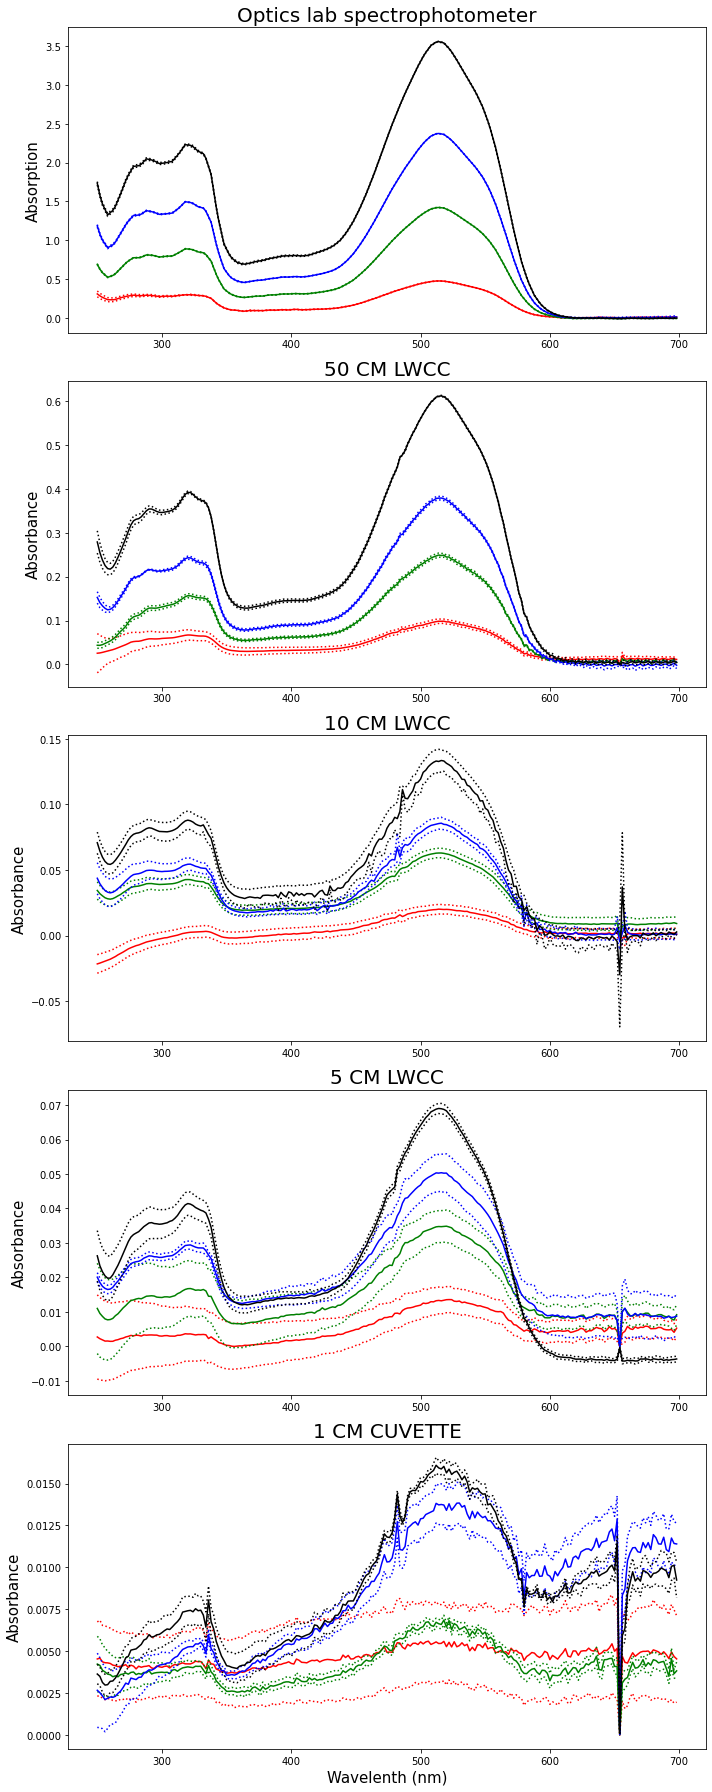

<Figure size 432x288 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt

# Define color mapping
color_mapping = {1: 'red', 3: 'green', 5: 'blue', 7.5: 'black'}

# Get the 'wl' row
wl = df_stats.loc['wl']

# Get the unique groups from 'LWCC' column
groups = ['spec','LWCC50', 'LWCC10', 'LWCC5', 'LWCC1']

# Define custom titles for each group
custom_titles = {
    'spec': 'Optics lab spectrophotometer',
    'LWCC50': '50 CM LWCC',
    'LWCC10': '10 CM LWCC',
    'LWCC5': '5 CM LWCC',
    'LWCC1': '1 CM CUVETTE',
}

custom_ylabs = {
    'spec': 'Absorption',
    'LWCC50': 'Absorbance',
    'LWCC10': 'Absorbance',
    'LWCC5': 'Absorbance',
    'LWCC1': 'Absorbance',
}

custom_xlabs = {
    'spec': '',
    'LWCC50': '',
    'LWCC10': '',
    'LWCC5': '',
    'LWCC1': 'Wavelenth (nm)',
}

# Create a figure with subplots equal to the number of groups
fig, axs = plt.subplots(len(groups), figsize=(10, 5*len(groups)))

# Ensure axs is always an array, even when there's only one subplot
if len(groups) == 1:
    axs = np.array([axs])

# Iterate over the groups and the subplots
for group, ax in zip(groups, axs):
    # Get the rows for this group
    group_rows = df_stats[df_stats['LWCC'] == group]
    
    # For each row in the group
    for _, row in group_rows.iterrows():
        # Get the 'mean' and 'mad' data
        mean_indices = row.index[row.index.str.contains('mean')]
        mean_data = row[mean_indices].values
        
        mad_data = row[mean_indices.str.replace('mean', 'mad')].values

        # Get the 'wl' data corresponding to 'mean' and 'mad' data
        wl_mean = wl[mean_indices].values

        # Get the color for this row
        color = color_mapping.get(int(row['Conc_ml']), 'black')  # Default to 'black' if the concentration is not in the mapping
        
        # Plot the 'mean' data
        ax.plot(wl_mean, mean_data, color=color)
        
        # Plot the 'mean' data minus the 'mad' data
        ax.plot(wl_mean, mean_data - mad_data, linestyle='dotted', color=color)
        
        # Plot the 'mean' data plus the 'mad' data
        ax.plot(wl_mean, mean_data + mad_data, linestyle='dotted', color=color)
        
        # Add labels for x and y axes
        ax.set_xlabel(custom_xlabs.get(group, group), size = 15)
        ax.set_ylabel(custom_ylabs.get(group, group), size = 15)
    
    # Set the title for this subplot
    ax.set_title(custom_titles.get(group, group), size = 20) # If there is no custom title, default to the group name

# Show the plot
plt.tight_layout()
plt.show()

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA_2/Plots/MAD_MEAN_FIG.png')